In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

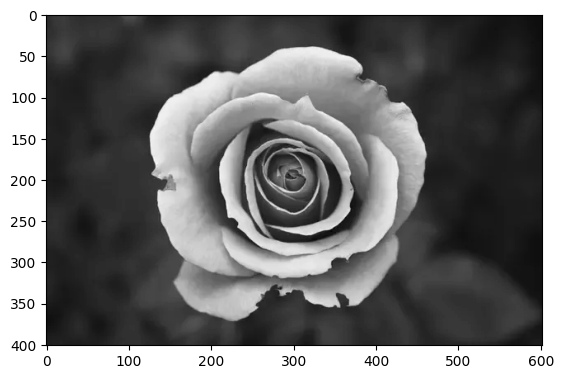

In [4]:
img = cv.imread('flower_gray.png', cv.IMREAD_GRAYSCALE)
img_ein = cv.imread('einstein.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()
th = 100
img2 = img > th
img2 = img2.astype(np.uint16)

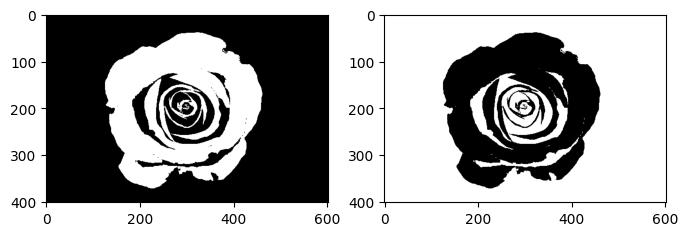

In [36]:
fig = plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(img2, cmap='gray')
plt.subplot(122)
plt.imshow(~(img2), cmap='gray')
plt.show()

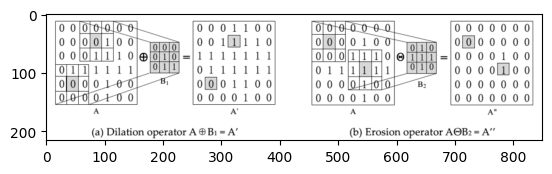

In [50]:
plt.imshow(cv.imread('erosion_dilation.png', cv.IMREAD_GRAYSCALE), cmap='gray')

In [37]:
k_rect = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
k_el = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
k_cr = cv.getStructuringElement(cv.MORPH_CROSS, (5, 5))

In [38]:
k_rect, k_el, k_cr

(array([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]], dtype=uint8),
 array([[0, 0, 1, 0, 0],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [0, 0, 1, 0, 0]], dtype=uint8),
 array([[0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [1, 1, 1, 1, 1],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0]], dtype=uint8))

In [44]:
erosion_rect = cv.erode(img2, k_rect)
erosion_el = cv.erode(img2, k_el)
erosion_cross = cv.erode(img2, k_cr)

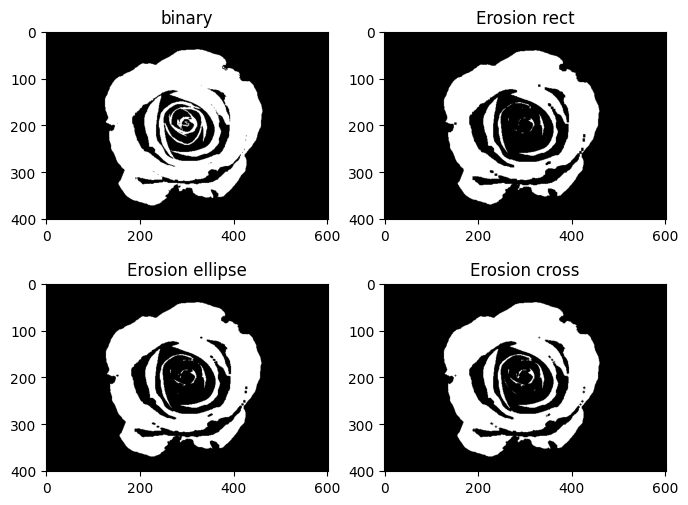

In [54]:
fig = plt.figure(figsize=(8, 6))
plt.subplot(221)
plt.title('binary')
plt.imshow(img2, cmap='gray')
plt.subplot(222)
plt.title('Erosion rect')
plt.imshow(erosion_rect, cmap='gray')
plt.subplot(223)
plt.title('Erosion ellipse')
plt.imshow(erosion_el, cmap='gray')
plt.subplot(224)
plt.title('Erosion cross')
plt.imshow(erosion_cross, cmap='gray')
plt.show()

In [55]:
dilate_rect = cv.dilate(img2, k_rect)
dilate_el = cv.dilate(img2, k_el)
dilate_cross = cv.dilate(img2, k_cr)

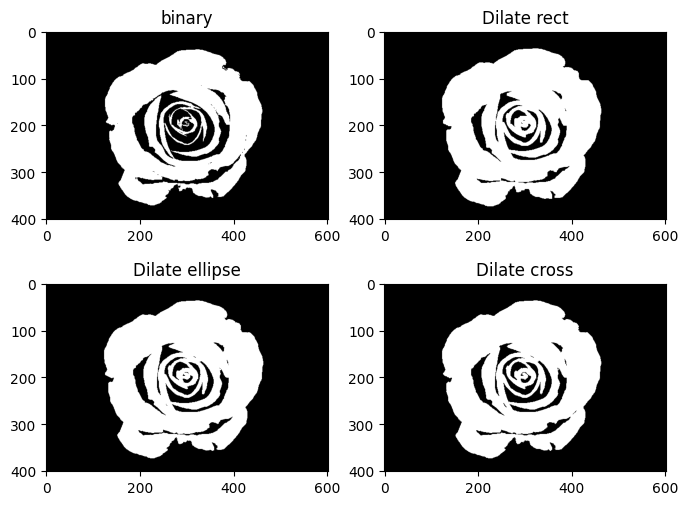

In [56]:
fig = plt.figure(figsize=(8, 6))
plt.subplot(221)
plt.title('binary')
plt.imshow(img2, cmap='gray')
plt.subplot(222)
plt.title('Dilate rect')
plt.imshow(dilate_rect, cmap='gray')
plt.subplot(223)
plt.title('Dilate ellipse')
plt.imshow(dilate_el, cmap='gray')
plt.subplot(224)
plt.title('Dilate cross')
plt.imshow(dilate_cross, cmap='gray')
plt.show()

In [57]:
img2.shape

(401, 602)

# opening: remove image noise out of the boundry
#### Erosion folowed by dilation

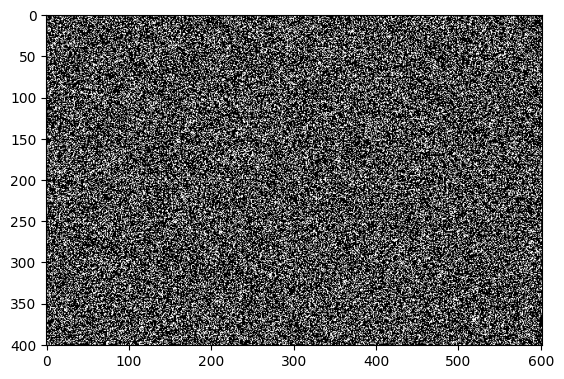

In [120]:
N = np.random.rand(img2.shape[0], img2.shape[1])
N = N > 0.7
plt.imshow(N, cmap='gray')
plt.show()

In [121]:
# img2_noisy = img2.copy()
# np.random.seed(5)
# for n in range(100):
#     i = np.random.randint(0, 400)
#     j = np.random.randint(0, 601)
#     img2_noisy[i-3:i, j-3:j] = 1

img2_noisy = img2 | N

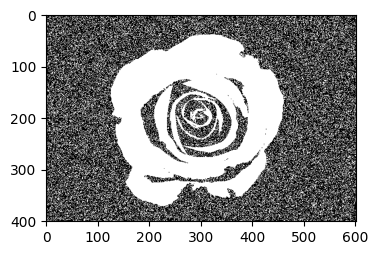

In [122]:
plt.figure(figsize=(4, 4))
plt.imshow(img2_noisy, cmap='gray')
plt.show()

# kernel size
erosion and dilation should have same kernel size
kernel size should be bigger than size

In [123]:
img2_noisy_eroded = cv.erode(img2_noisy, k_rect)
img2_noisy_eroded_dilated = cv.dilate(img2_noisy_eroded, k_rect)
img2_noisy_opening = cv.morphologyEx(img2_noisy, cv.MORPH_OPEN, k_rect)

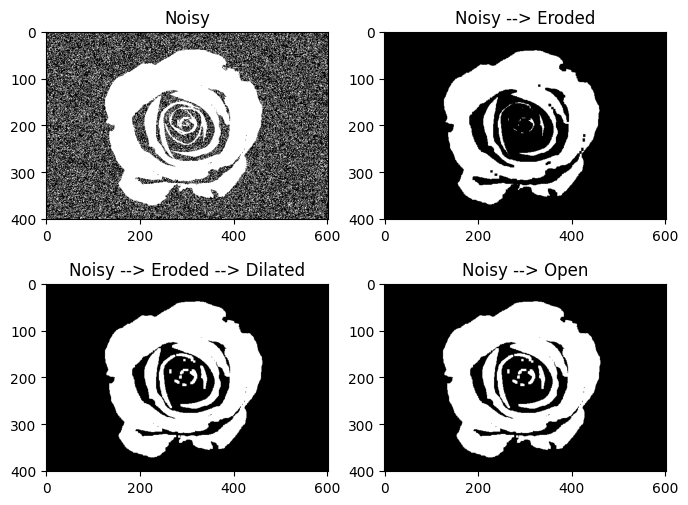

In [124]:
fig = plt.figure(figsize=(8, 6))
plt.subplot(221)
plt.title('Noisy')
plt.imshow(img2_noisy, cmap='gray')
plt.subplot(222)
plt.title('Noisy --> Eroded')
plt.imshow(img2_noisy_eroded, cmap='gray')
plt.subplot(223)
plt.title('Noisy --> Eroded --> Dilated')
plt.imshow(img2_noisy_eroded_dilated, cmap='gray')
plt.subplot(224)
plt.title('Noisy --> Open')
plt.imshow(img2_noisy_opening, cmap='gray')
plt.show()

# Closing: remove image noise out of the boundry
#### dilation folowed by erosion

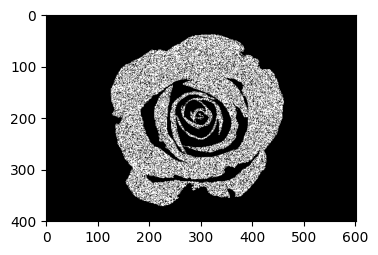

In [5]:
N = np.random.rand(img2.shape[0], img2.shape[1])
N = N < 0.7
img2_noisy = img2 & N
# img2_noisy = img2.copy()
# np.random.seed(42)
# for n in range(100):
#     i = np.random.randint(0, 400)
#     j = np.random.randint(0, 601)
#     img2_noisy[i-4:i, j-4:j] = 0
plt.figure(figsize=(4, 4))
plt.imshow(img2_noisy, cmap='gray')
plt.show()

In [153]:
img2_noisy_dilated = cv.dilate(img2_noisy, k_rect)
img2_noisy_dilated_eorded = cv.erode(img2_noisy_dilated, k_rect)
img2_noisy_closing = cv.morphologyEx(img2_noisy, cv.MORPH_CLOSE, k_rect)

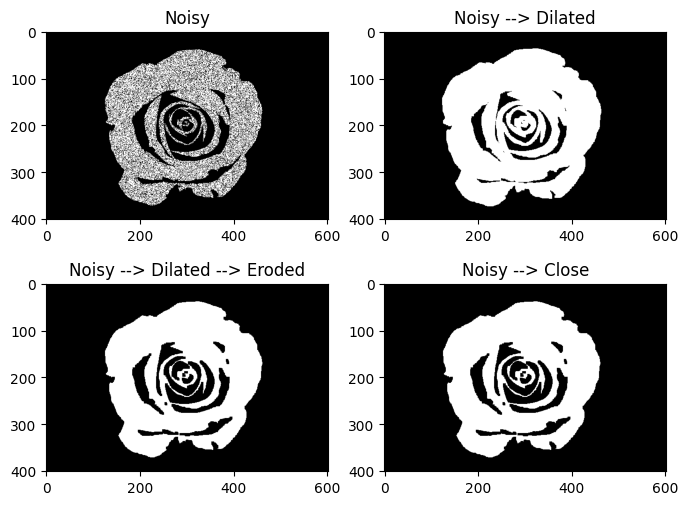

In [154]:
fig = plt.figure(figsize=(8, 6))
plt.subplot(221)
plt.title('Noisy')
plt.imshow(img2_noisy, cmap='gray')
plt.subplot(222)
plt.title('Noisy --> Dilated')
plt.imshow(img2_noisy_dilated, cmap='gray')
plt.subplot(223)
plt.title('Noisy --> Dilated --> Eroded')
plt.imshow(img2_noisy_dilated_eorded, cmap='gray')
plt.subplot(224)
plt.title('Noisy --> Close')
plt.imshow(img2_noisy_closing, cmap='gray')
plt.show()

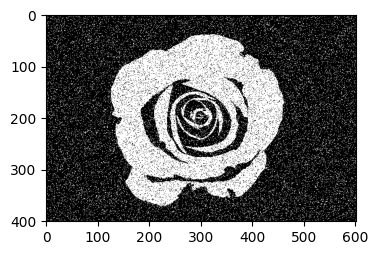

In [199]:
img2_noisy = img2.copy()

N = np.random.rand(img2.shape[0], img2.shape[1])
N = N > 0.9
img2_noisy = img2_noisy | N

N = np.random.rand(img2.shape[0], img2.shape[1])
N = N < 0.9
img2_noisy = img2_noisy & N

plt.figure(figsize=(4, 4))
plt.imshow(img2_noisy, cmap='gray')
plt.show()

In [200]:
img2_noisy_opening = cv.morphologyEx(img2_noisy, cv.MORPH_OPEN, k_rect)
img2_noisy_closing = cv.morphologyEx(img2_noisy, cv.MORPH_CLOSE, k_rect)

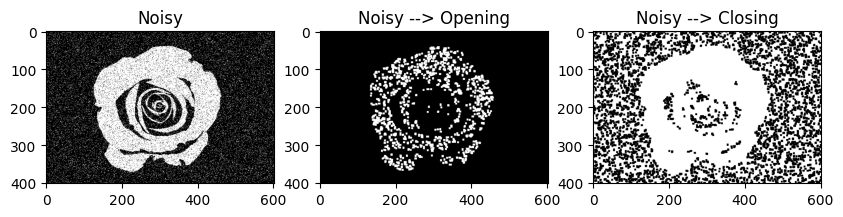

In [201]:
fig = plt.figure(figsize=(10, 8))
plt.subplot(131)
plt.title('Noisy')
plt.imshow(img2_noisy, cmap='gray')
plt.subplot(132)
plt.title('Noisy --> Opening')
plt.imshow(img2_noisy_opening, cmap='gray')
plt.subplot(133)
plt.title('Noisy --> Closing')
plt.imshow(img2_noisy_closing, cmap='gray')
plt.show()

# Gradient: remove noise of image out of the boundry
#### dilation - erosion 

In [202]:
img2_dilate = cv.dilate(img2, k_rect)
img2_eroded = cv.erode(img2, k_rect)
img2_gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, k_rect)

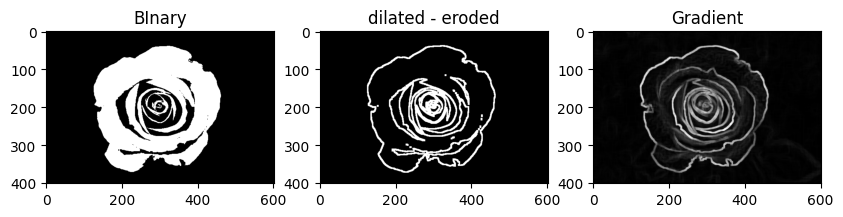

In [204]:
fig = plt.figure(figsize=(10, 8))
plt.subplot(131)
plt.title('BInary')
plt.imshow(img2, cmap='gray')
plt.subplot(132)
plt.title('dilated - eroded')
# we should substract dilated by eroded 
plt.imshow(img2_dilate - img2_eroded, cmap='gray')
plt.subplot(133)
plt.title('Gradient')
plt.imshow(img2_gradient, cmap='gray')
plt.show()

# Top Hat
input - Opening

# Black Hat 
close - input

In [206]:
img2_opening = cv.morphologyEx(img2, cv.MORPH_OPEN, k_rect)
img2_closing = cv.morphologyEx(img2, cv.MORPH_CLOSE, k_rect)
img_top = cv.morphologyEx(img2, cv.MORPH_TOPHAT, k_rect)
img_black = cv.morphologyEx(img2, cv.MORPH_BLACKHAT, k_rect)

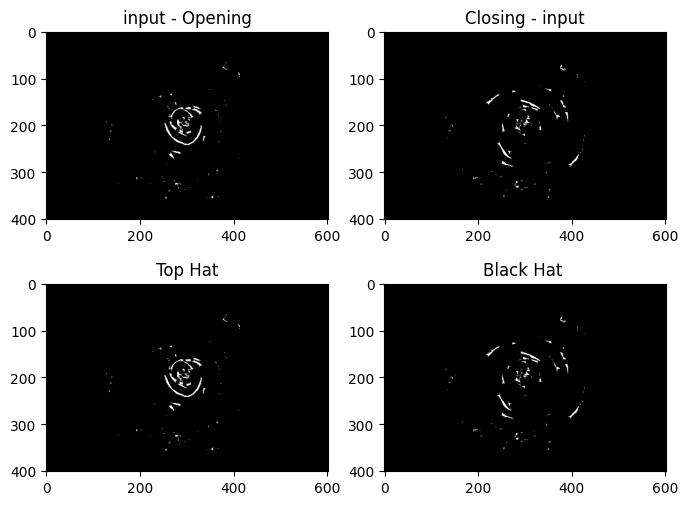

In [207]:
fig = plt.figure(figsize=(8, 6))
plt.subplot(221)
plt.title('input - Opening')
plt.imshow(img2 - img2_opening, cmap='gray')
plt.subplot(222)
plt.title('Closing - input')
plt.imshow(img2_closing - img2, cmap='gray')
plt.subplot(223)
plt.title('Top Hat')
plt.imshow(img_top, cmap='gray')
plt.subplot(224)
plt.title('Black Hat ')
plt.imshow(img_black, cmap='gray')
plt.show()